**Angel Aprilia Putri Lo - 0706022210003**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [1318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

## Load Dataset

In [1319]:
df = pd.read_csv('https://raw.githubusercontent.com/AngelApriliaPutri/Data-Mining/refs/heads/main/Bank.csv', delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [1320]:
#2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [1321]:
# 3
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [1322]:
# 4
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [1323]:
# 5
job_count = df['job'].value_counts(dropna=False)
print(job_count)
marital_count = df['marital'].value_counts(dropna=False)
print(marital_count)
education_count = df['education'].value_counts(dropna=False)
print(education_count)
default_count = df['default'].value_counts(dropna=False)
print(default_count)
housing_count = df['housing'].value_counts(dropna=False)
print(housing_count)
loan_count = df['loan'].value_counts(dropna=False)
print(loan_count)
contact_count = df['contact'].value_counts(dropna=False)
print(contact_count)
month_count = df['month'].value_counts(dropna=False)
print(month_count)
poutcome_count = df['poutcome'].value_counts(dropna=False)
print(poutcome_count)
y_count = df['y'].value_counts(dropna=False)
print(y_count)

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64
marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64
education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64
default
no     4445
yes      76
Name: count, dtype: int64
housing
yes    2559
no     1962
Name: count, dtype: int64
loan
no     3830
yes     691
Name: count, dtype: int64
contact
cellular     2896
unknown      1324
telephone     301
Name: count, dtype: int64
month
may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: count, dtype: int64
poutcome
unknown    3705
failure     490
other       197
success     129
Name: count, dtyp

In [1324]:
# Combine 'admin.' and 'management' under a new value 'admin_management' in the 'job' column
df['job'] = df['job'].replace({'admin.': 'admin_management', 'management': 'admin_management'})

# Recalculate the job counts to see the updated frequencies
job_count = df['job'].value_counts(dropna=False)
print(job_count)


job
admin_management    1447
blue-collar          946
technician           768
services             417
retired              230
self-employed        183
entrepreneur         168
unemployed           128
housemaid            112
student               84
unknown               38
Name: count, dtype: int64


In [1325]:
# Define columns with 'unknown' values to replace
columns_with_unknown = ['job', 'education', 'contact', 'poutcome']

# Replace 'unknown' with the mode in each specified column
for col in columns_with_unknown:
    mode_value = df[col].mode()[0]
    df.loc[df[col] == 'unknown', col] = mode_value

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,admin_management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,admin_management,married,tertiary,no,1476,yes,yes,cellular,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,cellular,5,may,226,1,-1,0,unknown,no


In [1326]:
# 5
job_count = df['job'].value_counts(dropna=False)
print(job_count)
marital_count = df['marital'].value_counts(dropna=False)
print(marital_count)
education_count = df['education'].value_counts(dropna=False)
print(education_count)
default_count = df['default'].value_counts(dropna=False)
print(default_count)
housing_count = df['housing'].value_counts(dropna=False)
print(housing_count)
loan_count = df['loan'].value_counts(dropna=False)
print(loan_count)
contact_count = df['contact'].value_counts(dropna=False)
print(contact_count)
month_count = df['month'].value_counts(dropna=False)
print(month_count)
poutcome_count = df['poutcome'].value_counts(dropna=False)
print(poutcome_count)
y_count = df['y'].value_counts(dropna=False)
print(y_count)

job
admin_management    1485
blue-collar          946
technician           768
services             417
retired              230
self-employed        183
entrepreneur         168
unemployed           128
housemaid            112
student               84
Name: count, dtype: int64
marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64
education
secondary    2493
tertiary     1350
primary       678
Name: count, dtype: int64
default
no     4445
yes      76
Name: count, dtype: int64
housing
yes    2559
no     1962
Name: count, dtype: int64
loan
no     3830
yes     691
Name: count, dtype: int64
contact
cellular     4220
telephone     301
Name: count, dtype: int64
month
may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: count, dtype: int64
poutcome
unknown    3705
failure     490
other       197
success     129
Name: count, dtype: int64
y
no     4000
yes     521
Nam

In [1327]:
le = LabelEncoder()
df['job'] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['month'] = le.fit_transform(df['month'])
df['poutcome'] = le.fit_transform(df['poutcome'])
df['y'] = le.fit_transform(df['y'])
edu_mapping = {'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3}
df['education'] = df['education'].map(edu_mapping)
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,9,1,1,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,6,1,2,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,0,2,3,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,0,1,3,0,1476,1,1,0,3,6,199,4,-1,0,3,0
4,59,1,1,2,0,0,1,0,0,5,8,226,1,-1,0,3,0


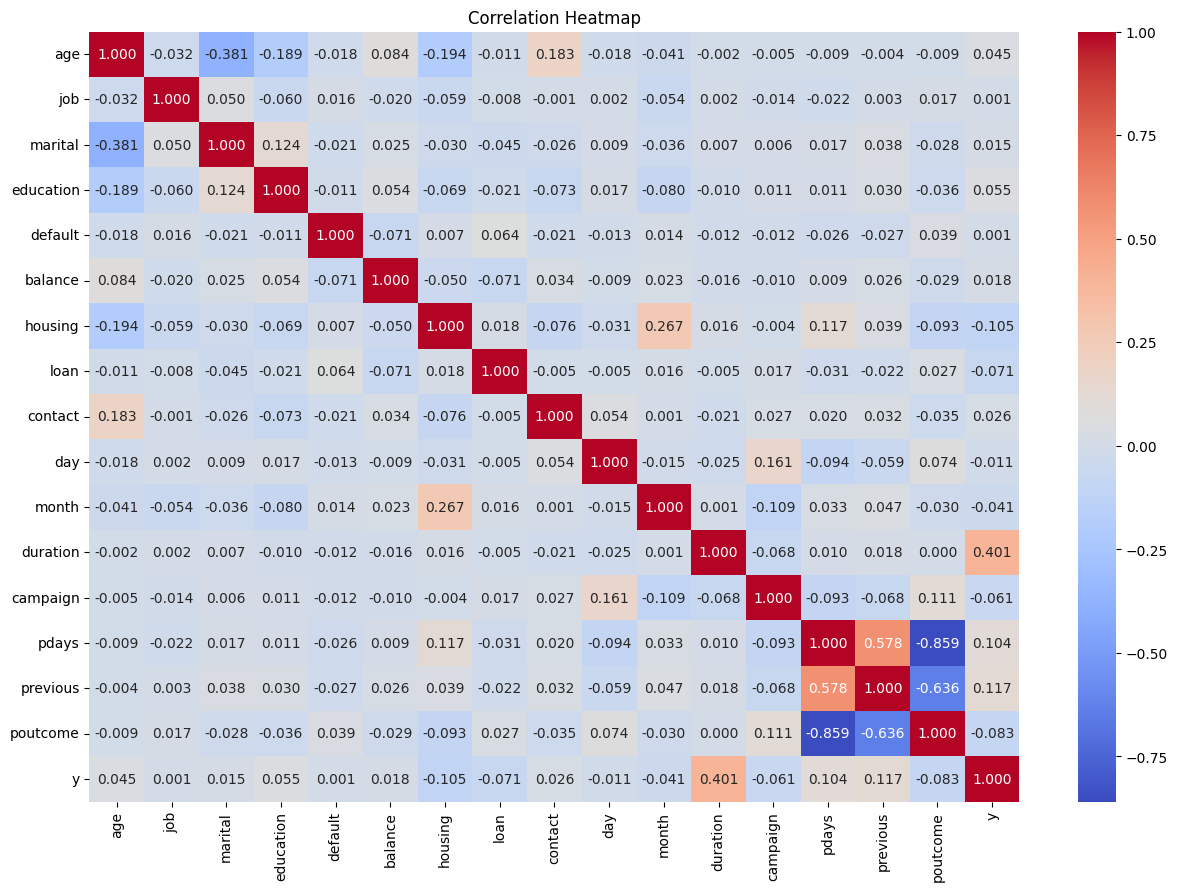

In [1328]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation Heatmap')
plt.show()

## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

---

## Machine Learning (Split Data) menggunakan semua variabel X

In [1329]:
# 1
X = df.drop('y', axis=1)
y = df['y']

In [1330]:
# 2
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [1331]:
# 3
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [1332]:
# 4
X_train.shape, X_test.shape

((6400, 16), (1600, 16))

In [1333]:
# 5
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [1334]:
# 6
y_pred = clf.predict(X_test)

In [1335]:
# 7
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.863125


In [1336]:
# 8
train_score = clf.score(X_train, y_train)
print(f"Training set score: {train_score:.4f}")

test_score = clf.score(X_test, y_test)
print(f"Test set score: {test_score:.4f}")

Training set score: 0.8575
Test set score: 0.8631


In [1337]:
# 9
conf_matrix_rf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Random Forest):")
print(conf_matrix_rf)

Confusion Matrix (Random Forest):
[[669 132]
 [ 87 712]]


In [1338]:
# 10
class_report_rf = classification_report(y_test, y_pred)
print("Classification Report (Random Forest):")
print(class_report_rf)

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       801
           1       0.84      0.89      0.87       799

    accuracy                           0.86      1600
   macro avg       0.86      0.86      0.86      1600
weighted avg       0.86      0.86      0.86      1600



---
### Machine Learning (Split Data) menggunakan beberapa variable saja (duration, pdays, previous, housing)

In [1339]:
# 1
X = df[['duration', 'pdays', 'previous', 'housing']]
y = df['y']

In [1340]:
# 2
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [1341]:
# 3
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [1342]:
# 4
X_train.shape, X_test.shape

((6400, 4), (1600, 4))

In [1343]:
# 5
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [1344]:
# 6
y_pred = clf.predict(X_test)

In [1345]:
# 7
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.838125


In [1346]:
# 8
train_score = clf.score(X_train, y_train)
print(f"Training set score: {train_score:.4f}")

test_score = clf.score(X_test, y_test)
print(f"Test set score: {test_score:.4f}")

Training set score: 0.8233
Test set score: 0.8381


In [1347]:
# 9
conf_matrix_rf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Random Forest):")
print(conf_matrix_rf)

Confusion Matrix (Random Forest):
[[645 156]
 [103 696]]


In [1348]:
# 10
class_report_rf = classification_report(y_test, y_pred)
print("Classification Report (Random Forest):")
print(class_report_rf)

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       801
           1       0.82      0.87      0.84       799

    accuracy                           0.84      1600
   macro avg       0.84      0.84      0.84      1600
weighted avg       0.84      0.84      0.84      1600



#  Conclusion
#### Melakukan SMOTE pada data dengan tujuan untuk mengatasi ketidakseimbangan kelas dalam dataset.
#### Saya melakukan 2 percobaan:
1. Yang pertama menggunakan semua variabel
2. Yang kedua hanya menggunakan 4 variabel yang paling bagus dilihat dari heatmap.

#### Berdasarkan dua percobaan yang dilakukan, model dengan semua variabel menunjukkan hasil yang lebih baik dibandingkan model yang menggunakan empat variabel. Berikut adalah alasannya:
* Akurasi yang Lebih Tinggi: Model dengan semua variabel mencapai akurasi 86.31%, sedangkan model dengan empat variabel hanya mencapai akurasi 83.81%. Ini menunjukkan bahwa model dengan semua variabel lebih efektif dalam mengenali pola dalam data.
* Training Set Score yang Lebih Stabil: Training set score untuk model dengan semua variabel adalah 85.75%, sedangkan model dengan empat variabel hanya 82.33%. Skor ini menunjukkan bahwa model dengan semua variabel mampu mempelajari data latih dengan lebih baik.
* Kinerja Kelas yang Lebih Baik: Dalam Classification Report, model dengan semua variabel menunjukkan nilai precision dan recall yang lebih baik untuk kedua kelas. Misalnya, untuk kelas 0, precision dan recall masing-masing adalah 88% dan 84%, sedangkan untuk model dengan empat variabel, precision dan recall untuk kelas yang sama adalah 86% dan 81%. Ini menunjukkan bahwa model dengan semua variabel lebih baik dalam mendeteksi kelas-kelas minoritas dan mayoritas.


## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

---

### Machine Learning (Split Data) menggunakan semua variabel X

In [1349]:
# 1
X = df.drop('y', axis=1)
y = df['y']

In [1350]:
# 2
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [1351]:
# 3
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [1352]:
# 4
X_train.shape, X_test.shape

((6400, 16), (1600, 16))

In [1353]:
# 5
clf = GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42)
clf.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, random_state=42)

In [1354]:
# 6
y_pred = clf.predict(X_test)

In [1355]:
# 7
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.915


In [1356]:
# 8
train_score = clf.score(X_train, y_train)
print(f"Training set score: {train_score:.4f}")

test_score = clf.score(X_test, y_test)
print(f"Test set score: {test_score:.4f}")

Training set score: 0.9573
Test set score: 0.9150


In [1357]:
# 9
conf_matrix_rf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Random Forest):")
print(conf_matrix_rf)

Confusion Matrix (Random Forest):
[[716  85]
 [ 51 748]]


In [1358]:
# 10
class_report_rf = classification_report(y_test, y_pred)
print("Classification Report (Random Forest):")
print(class_report_rf)

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       801
           1       0.90      0.94      0.92       799

    accuracy                           0.92      1600
   macro avg       0.92      0.92      0.91      1600
weighted avg       0.92      0.92      0.91      1600



---
### Machine Learning (Split Data) menggunakan beberapa variable saja (duration, pdays, previous, housing)

In [1359]:
# 1
X = df[['duration', 'pdays', 'previous', 'housing']]
y = df['y']

In [1360]:
# 2
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [1361]:
# 3
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [1362]:
# 4
X_train.shape, X_test.shape

((6400, 4), (1600, 4))

In [1363]:
# 5
clf = GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42)
clf.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, random_state=42)

In [1364]:
# 6
y_pred = clf.predict(X_test)

In [1365]:
# 7
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.864375


In [1366]:
# 8
train_score = clf.score(X_train, y_train)
print(f"Training set score: {train_score:.4f}")

test_score = clf.score(X_test, y_test)
print(f"Test set score: {test_score:.4f}")

Training set score: 0.8734
Test set score: 0.8644


In [1367]:
# 9
conf_matrix_rf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Random Forest):")
print(conf_matrix_rf)

Confusion Matrix (Random Forest):
[[660 141]
 [ 76 723]]


In [1368]:
# 10
class_report_rf = classification_report(y_test, y_pred)
print("Classification Report (Random Forest):")
print(class_report_rf)

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       801
           1       0.84      0.90      0.87       799

    accuracy                           0.86      1600
   macro avg       0.87      0.86      0.86      1600
weighted avg       0.87      0.86      0.86      1600



# Conclusion
#### Melakukan SMOTE pada data dengan tujuan untuk mengatasi ketidakseimbangan kelas dalam dataset.
#### Saya melakukan 2 percobaan:
1. Yang pertama menggunakan semua variabel
2. Yang kedua hanya menggunakan 4 variabel yang paling bagus dilihat dari heatmap.

#### Berdasarkan dua percobaan yang dilakukan dengan menggunakan Gradient Boosting, model yang menggunakan semua variabel menunjukkan hasil yang lebih baik dibandingkan model yang hanya menggunakan empat variabel. Berikut adalah alasannya:
* Akurasi yang Lebih Tinggi: Model dengan semua variabel mencapai akurasi 91.5%, sedangkan model dengan empat variabel hanya mencapai akurasi 86.44%. Ini menunjukkan bahwa model dengan semua variabel lebih efektif dalam mengenali pola dalam data.
* Training Set Score yang Lebih Stabil: Training set score untuk model dengan semua variabel adalah 95.73%, sedangkan model dengan empat variabel hanya 87.34%. Skor ini menunjukkan bahwa model dengan semua variabel mampu mempelajari data latih dengan lebih baik dan lebih mendalam.
* Kinerja Kelas yang Lebih Baik: Dalam Classification Report, model dengan semua variabel menunjukkan nilai precision dan recall yang lebih baik untuk kedua kelas. Misalnya, untuk kelas 0, precision dan recall masing-masing adalah 93% dan 89%, sedangkan untuk model dengan empat variabel, precision dan recall untuk kelas yang sama adalah 90% dan 82%. Ini menunjukkan bahwa model dengan semua variabel lebih baik dalam mendeteksi kelas-kelas minoritas dan mayoritas.